In [0]:
# Pronóstico de la evolución de pacientes con diabetes

## Descripción del problema real

Los tratamientos médicos están basados en las expectativas de recuperación o el avance de una enfermedad para tomar decisiones. En este caso, un equipo médico desea contar con pronósticos de pacientes con diabetes para tomar decisiones sobre su tratamiento.

## Descripción del problema en términos de los datos

Se desea determinar el progreso de la diabeteis un año hacia adelante a partir de las variables medidas para 442 pacientes. La información está almacenada en el archivo `datos/diabetes.csv`. Las variables medidas son: edad, sexo, indice de masa corporal, presión sanguinea y seis medidas de serum en la sangre. Se desea pronósticar el progreso de la enfermedad a partir de las variables dadas.

## Aproximaciones posibles

En este caso, se desea comparar los resultados de un modelo de regresión lineal y un modelo de redes neuronales artificiales.

## Requerimientos

Usted debe:

* Determinar cuáles de las variables consideradas son relevantes para el problema.


* Determinar si hay alguna transformación de las variables de entrada o de salida que mejore el pronóstico del modelo.


* Construir un modelo de regresión lineal que sirva como base para construir un modelo de redes neuronales artificiales.



* Construir un modelo de redes neuronales artificiales. Asimismo, debe determinar el número de neuronas en la capa o capas ocultas.


* Utiizar una técnica como crossvalidation u otra similar para establecer la robustez del modelo.

# Solucion
## Carga de datos

In [0]:
#imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import altair as alt
import math
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
%matplotlib inline
%load_ext rpy2.ipython

### Carga de datos
url = 'https://raw.githubusercontent.com/ANN-2019-2/evaluacion-dascardonaca/master/datos/diabetes.csv'
df = pd.read_csv(url)
df.describe()

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634599e-16,1.296411e-16,-8.042209e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.575274e-16,3.780755e-16,-3.830854e-16,-3.411950e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


#### Se crea un modelo base el cual aproxima solo con el valor promedio de los valores posibles y se normalizan los datos de las X para trabajar con estos normalizados de ahora en adelante


In [0]:
class baseModel():
    def __init__(self):   #
        self.intercept_ = None

    def fit(self, X, y):
        d=y
        if self.intercept_ is None:
            self.intercept_ = y.mean()

        errors2 = []
        forecasts = []

        for i in range(X.shape[0]):
            u = self.intercept_
            #print(d)
            e = (d[i] - u)
            #self.coef_ += 2 * self.learning_rate * e * X[i,:]
            #self.intercept_ += 2 * self.learning_rate * e
            errors2.append(e**2)
            forecasts.append(u)

        return errors2, forecasts

    def predict(self, X):
        if not isinstance(X, np.ndarray):
            X = np.array(X)
        u = self.intercept_
        return u

In [0]:
base = baseModel()
X=df[df.columns.delete('10')]
Y=df['Y']

In [0]:
scaler = MinMaxScaler()
X_norm = pd.DataFrame(scaler.fit_transform(X), columns = X.columns,)
X_norm.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.666667,1.0,0.582645,0.549296,0.294118,0.256972,0.207792,0.282087,0.562217,0.439394
1,0.483333,0.0,0.148760,0.352113,0.421569,0.306773,0.623377,0.141044,0.222443,0.166667
2,0.883333,1.0,0.516529,0.436620,0.289216,0.258964,0.246753,0.282087,0.496584,0.409091
3,0.083333,0.0,0.301653,0.309859,0.495098,0.447211,0.233766,0.423131,0.572936,0.469697
4,0.516667,0.0,0.206612,0.549296,0.465686,0.417331,0.389610,0.282087,0.362369,0.333333


In [0]:
errors,forecasts = base.fit(X_norm,Y)

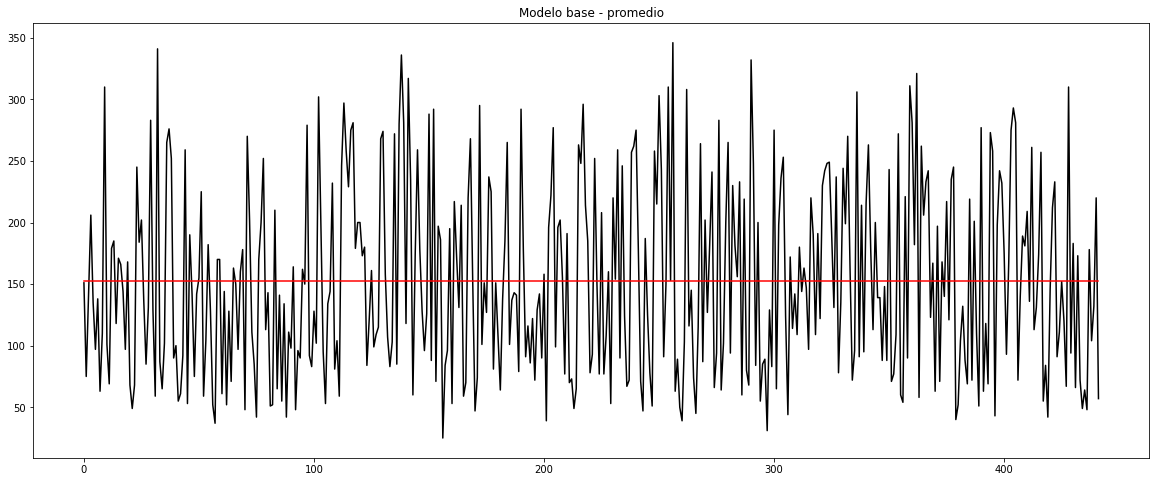

In [0]:
plt.figure(figsize=(20,8))
plt.title("Modelo base - promedio")
plt.plot(range(len(forecasts)), Y, color='black');
plt.plot(range(len(forecasts)), forecasts, color = 'red');

#### Se procede a realizar un modelo lineal base, en pos de mejorar la primer aproximación

In [0]:

class linearModel():
    def __init__(self):   
        self.columns = []
        self.warmStart = False

    def fit(self, params,X, y):
        d=y
        self.params = params
        errors2 = {}
        forecasts = []
        modelo = {}
        if not self.warmStart:
            self.columns = []######3
        for param in range(params):
            activeColumns=[]
            errors2 = {}

            for i in X.columns.delete(activeColumns):
                #print(i)
                if i not in self.columns:
                    modelo[i] = linear_model.LinearRegression()
                    activeColumns = self.columns
                    activeColumns.append(i)
                    #print(activeColumns)
                    modelo[i].fit(X[activeColumns], y)
                    y_pred = modelo[i].predict(X[activeColumns])
                    errors2[i]=(mean_squared_error(y, y_pred))
                    activeColumns.remove(activeColumns[-1])
            self.columns.append(min(errors2, key=errors2.get))
            #print(self.columns)
            #print(errors2)
            
        return(errors2[min(errors2, key=errors2.get)])
        #errors2[param] = []
        #forecasts[param] = []

    def predict(self, X):
        if not isinstance(X, np.ndarray):
            X = np.array(X)
        u = self.intercept_
        return u

In [0]:
linear = linearModel()

#### Para este modelo lineal se realizan transformaciones en la variable respuesta Y, para intentar aproximar de una mejor manera la solución

In [0]:

def transformar(vector,Strans,trans):
    newVector=[]
    for element in vector:
        #print(trans(element))
        newVector.append(trans(element))
    #print(newVector)
    newVector=pd.DataFrame(newVector,columns=[Strans])
    return newVector


np.arcsinh
transformations = {}
transformations['-'] = lambda i: i
transformations['^2'] = lambda i : i**2
transformations['^3'] = lambda i: i**3
transformations['raiz2'] = lambda i: i ** (1. / 2)
transformations['raiz3'] = lambda i: np.cbrt(i)
transformations['ln'] = lambda i: math.log(i)
transformations['sinh'] = lambda i: np.sinh(i)


itransformations = {}
itransformations['-'] = lambda i: i
itransformations['^2'] = lambda i : i ** (1. /2)
itransformations['^3'] = lambda i: np.cbrt(i)
itransformations['raiz2'] = lambda i: i ** 2
itransformations['raiz3'] = lambda i: i ** 3
itransformations['ln']=lambda i: math.exp(i)
itransformations['sinh'] = lambda i: np.arcsinh(i)

Y_trans = {}
errors = {}
for trans in transformations:
    Y_trans[trans] = transformar(Y,trans,transformations[trans])
    #print(trans)
    errors[trans] = linear.fit(10,X_norm,Y_trans[trans])
print(errors)
print('La transformación de Y que menor error (mse) reporta es: ',min(errors, key=errors.get))

{'-': 2859.6903987680657, '^2': 354399342.15714246, '^3': 35205903322971.16, 'raiz2': 4.935565564493872, 'raiz3': 0.43274622458430256, 'ln': 0.16059621569973928, 'sinh': 1.8252114439726333e+297}
La transformación de Y que menor error (mse) reporta es:  ln


Se puede observar que la transformación en la variable respuesta que menor error cuadratico medio reporta después de hacer las pruebas es el logaritmo natural, por lo que se seguirá utilizando en los siguientes modelos

Se procede a realizar las pruebas de transformaciones en las variables independientes

In [0]:

class nolinearModel():
    def __init__(self):   #
        self.columns = []
        self.warmStart = False
        self.transformations = {}
        self.transformations['-'] = lambda i: i
        self.transformations['^2'] = lambda i : i**2
        self.totalColumns = None
    
        self.transformations['^3'] = lambda i: i**3
        self.transformations['raiz2'] = lambda i: abs(i) ** (1. / 2)
        self.transformations['raiz3'] = lambda i: np.cbrt(i)
        #self.transformations['ln']=lambda i: math.log(abs(i))
        self.transformations['sinh']=lambda i: np.sinh(i)

        self.bestError = math.inf
    def fit(self, params,X, y):
        breakingFlag=False
        d=y
        self.params = params
        errors2 = {}
        forecasts = []
        modelo = {}
        descartedColumns=[]
        if not self.warmStart:
            self.columns = []######
        for param in range(params):
            errors2 = {}
            transformado={}
            ii={}
            #print(X.columns.delete(X.columns.i))
            for i in X.columns:
                #print(i)
                if i not in descartedColumns:
                    #descartedColumns.append(i)
                    
                    atransformar=X[i]
                    for trans in self.transformations:
                        nuevo=self.totalColumns
                        modelo[i+trans] = linear_model.LinearRegression()
                        ii[i+trans]=i
                        transformado[i+trans] = transformar(atransformar,i+trans,self.transformations[trans])
                        #print('--------------------')
                        #print(nuevo.join(transformado,rsuffix='trans'))
                        if (nuevo is None):
                            nuevo=transformado[i+trans]
                        else:
                            nuevo=nuevo.join(transformado[i+trans],rsuffix='trans')
                        #print(nuevo)
                        modelo[i+trans].fit(nuevo, y)
                        y_pred = modelo[i+trans].predict(nuevo)                   
                        errors2[i+trans]=(mean_squared_error(y, y_pred))

            descartedColumns.append(ii[min(errors2, key=errors2.get)])
            self.columns.append(min(errors2, key=errors2.get))
            if self.totalColumns is None:
                self.totalColumns = transformado[min(errors2, key=errors2.get)]
            else:
                self.totalColumns=self.totalColumns.join(transformado[min(errors2, key=errors2.get)])
            #print(self.columns)
            #print(descartedColumns)
            #print('aaaaa ', abs(self.bestError-errors2[min(errors2, key=errors2.get)]))
            if abs(self.bestError-errors2[min(errors2, key=errors2.get)]) <= 0.001:
                breakingFlag=True
            if errors2[min(errors2, key=errors2.get)] <= self.bestError:
                self.bestError = errors2[min(errors2, key=errors2.get)]
            if breakingFlag==True:
                break        
            #print(errors2[min(errors2, key=errors2.get)])
        modelo = linear_model.LinearRegression()
        modelo.fit(self.totalColumns, y)
        y_pred = modelo.predict(self.totalColumns)
        Y_pred_untrans = transformar(y_pred,0,itransformations['ln'])
        Y_untrans = transformar(y['ln'],0,itransformations['ln'])[0]
        errors2 = (mean_squared_error(Y_untrans, y_pred))
        return self.totalColumns,errors2,y_pred

In [0]:
def transformar(vector,Strans,trans):
    newVector=[]
    for element in vector:
        #print(trans(element))
        newVector.append(trans(element))
    #print(newVector)
    newVector=pd.DataFrame(newVector,columns=[Strans])
    return newVector

In [0]:
model = nolinearModel()
Y_trans = Y_trans['ln']

datosmodelosnolineal, errorNoLineal, ynolineal= model.fit(10,X_norm,Y_trans)
print(errorNoLineal)
print(datosmodelosnolineal)

27570.715615909092
          s5-   bmisinh      bp^2       s3-   sexsinh     age^3
0    0.562217  0.616174  0.301726  0.207792  1.175201  0.296296
1    0.222443  0.149310  0.123983  0.623377  0.000000  0.112912
2    0.496584  0.539806  0.190637  0.246753  1.175201  0.689245
3    0.572936  0.306249  0.096013  0.233766  0.000000  0.000579
4    0.362369  0.208085  0.301726  0.389610  0.000000  0.137921
..        ...       ...       ...       ...       ...       ...
437  0.605670  0.434079  0.495933  0.259740  1.175201  0.319079
438  0.415790  0.289003  0.033525  0.259740  1.175201  0.101630
439  0.305040  0.289003  0.281448  0.272727  1.175201  0.319079
440  0.657020  0.516440  0.216029  0.259740  0.000000  0.022745
441  0.469308  0.066164  0.016068  0.974026  0.000000  0.022745

[442 rows x 6 columns]


**Después de las pruebas realizadas, las variables seleccionadas con sus respectivas transformaciones son:**

**S5:** Sin transformacion

**bmi:** Seno hiperbólico

**bp:** Elevado al cuadrado

**s3:** Sin transformacion

**sex:** Seno hiperbólico

**age:** Elevado al cubo

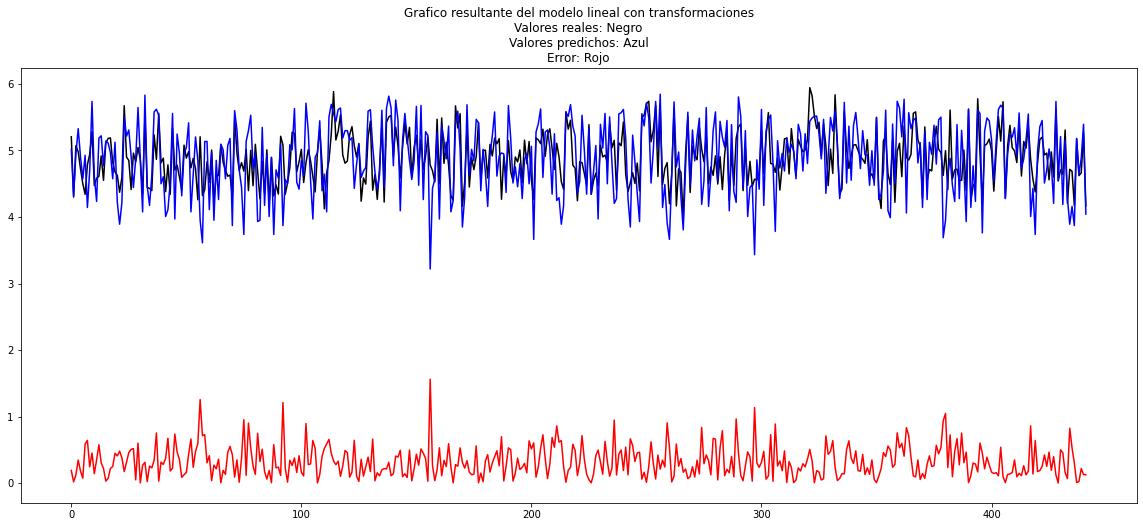

In [0]:
plt.figure(figsize=(20,8))
plt.title('Grafico resultante del modelo lineal con transformaciones\nValores reales: Negro\nValores predichos: Azul\nError: Rojo')
plt.plot(range(len(ynolineal)),ynolineal, color='black');
plt.plot(range(len(ynolineal)),Y_trans,color='blue')
plt.plot(range(len(ynolineal)),abs(Y_trans-ynolineal), color='red')

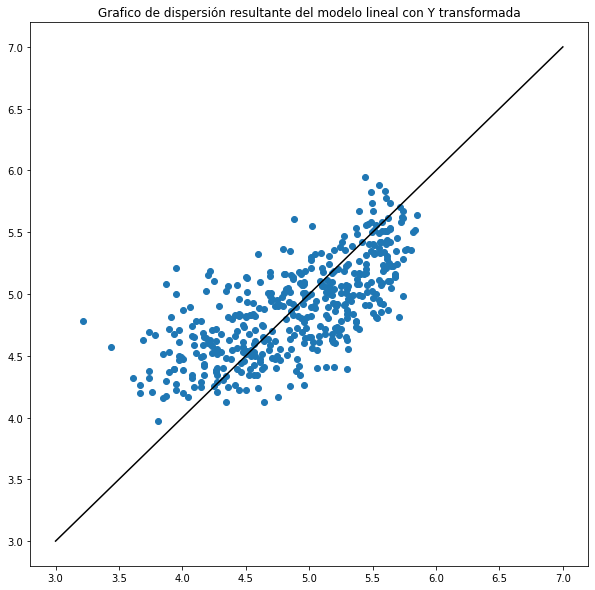

In [0]:
plt.figure(figsize=(10,10))
plt.title('Grafico de dispersión resultante del modelo lineal con Y transformada')
plt.plot([3,7],[3,7], color = "black")
plt.scatter(np.array(Y_trans), np.array(ynolineal))

Se procede a normalizar los datos después de las transformaciones para utilizarlos en la red neuronal

In [0]:
dff=datosmodelosnolineal
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(dff), columns = dff.columns)
df_norm.head()

,s5-,bmisinh,bp^2,s3-,sexsinh,age^3
0,0.562217,0.524314,0.301726,0.207792,1.0,0.296296
1,0.222443,0.127050,0.123983,0.623377,0.0,0.112912
2,0.496584,0.459331,0.190637,0.246753,1.0,0.689245
3,0.572936,0.260592,0.096013,0.233766,0.0,0.000579
4,0.362369,0.177063,0.301726,0.389610,0.0,0.137921


Se procede a realizar la red neuronal, se realiza el CrossValidation realizando 5 splits diferentes de los datos y se procede a la evaluación de los modelos

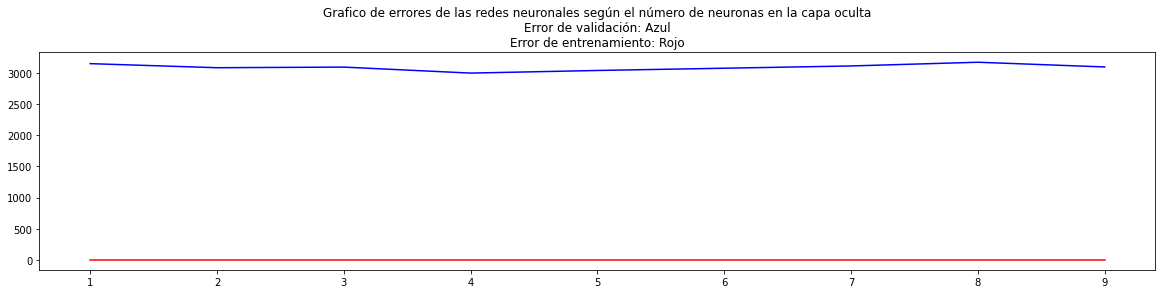

In [0]:
Y_trans_scaled = Y_trans.to_numpy()
Y_trans_min = Y_trans_scaled.min()
Y_trans_max = Y_trans_scaled.max()
Y_trans_scaled = np.interp(Y_trans_scaled, (Y_trans_min, Y_trans_max), (0, 1))
Y_trans_scaled = pd.DataFrame(Y_trans_scaled)
Y_trans_scaled = Y_trans_scaled[0]
#print(Y_trans_scaled)
## Spliter para crossvalidation

rkf = RepeatedKFold(n_splits=5,
                    random_state=1)
#numero de neuronas en la primer capa oculta
validation_errors = []
training_errors = []

modelos = {}
## i=numero de neuronas en el 
for i in range(1,10):
    breakingFlag=False
    m = MLPRegressor(hidden_layer_sizes=(i, ),
                activation = 'logistic',
                solver='lbfgs',
                max_iter = 1000000,
                learning_rate ='adaptive',
                random_state = 1,
                shuffle = True,
                warm_start = True)
    modelos[i] = m
    Y_tested = []
    Y_predicted = []
    error_entrenamiento = 0
    c=0
    for train, test in rkf.split(df_norm):
        ### Entrenar
        X_train = df_norm[df_norm.index.isin(train)]
        Y_train = (Y_trans_scaled[Y_trans_scaled.index.isin(train)])
        m.fit(X_train,Y_train)
        error_entrenamiento+=(m.loss_)
        c+=1
        X_test = df_norm[df_norm.index.isin(test)]
        for item in Y[Y.index.isin(test)]:
            Y_tested.append(item)
        Y_pred = m.predict(X_test)
        Y_pred_reescaled = np.interp(Y_pred, (0, 1), (Y_trans_min, Y_trans_max))
        Y_pred_untrans = transformar(Y_pred_reescaled,0,itransformations['ln'])
        Y_predicted.append(Y_pred_untrans)
        
        Y_predictedd = [item for sublist in Y_predicted for item in sublist[0]]
        #print((Y_predicted))
        #print(len(Y_tested))
    validation_error = mean_squared_error(Y_tested, Y_predictedd)
    #validation_error = mean_absolute_error(Y_tested, Y_predictedd)
    validation_errors.append(validation_error)
    training_errors.append(m.loss_)

plt.figure(figsize=(20,4))
plt.title('Grafico de errores de las redes neuronales según el número de neuronas en la capa oculta\nError de validación: Azul\nError de entrenamiento: Rojo')
plt.plot(range(1,len(validation_errors)+1),validation_errors, color='blue');
plt.plot(range(1,len(training_errors)+1),training_errors, color='red');

Como la grafica anterior es poco clara a la hora de decirnos los errores, se separan en gráficas aparte

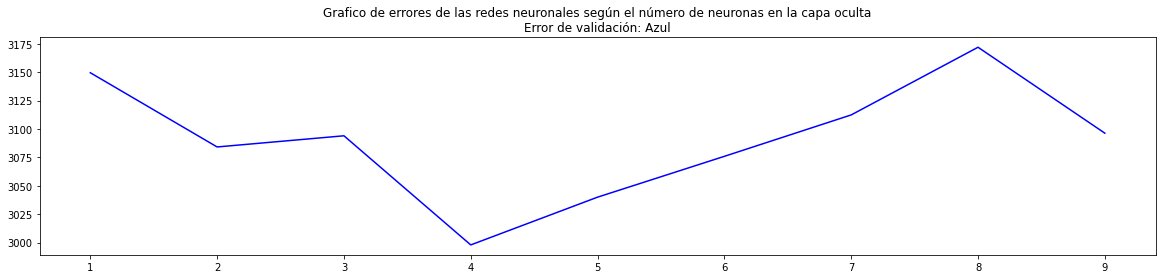

In [0]:
plt.figure(figsize=(20,4))
plt.title('Grafico de errores de las redes neuronales según el número de neuronas en la capa oculta\nError de validación: Azul')
plt.plot(range(1,len(validation_errors)+1),validation_errors, color='blue');

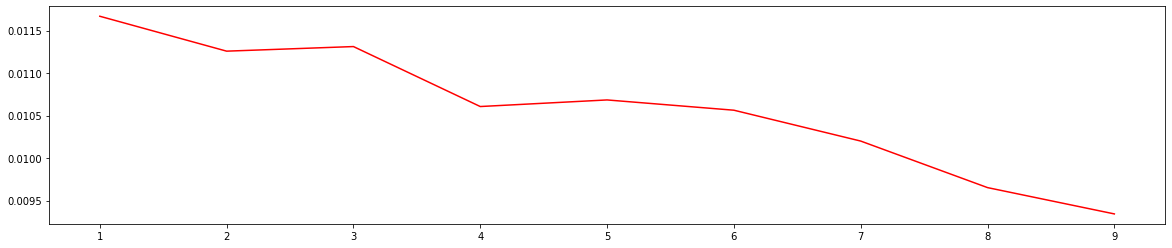

In [0]:
plt.figure(figsize=(20,4))
('Grafico de errores de las redes neuronales según el número de neuronas en la capa oculta\nError de entrenamiento: Rojo')
plt.plot(range(1,len(training_errors)+1),training_errors, color='red');

In [0]:
errorNoLineal

27570.715615909092

Se puede observar una reducción significativa en los errores de la red neuronal con respecto del modelo no lineal, sin embargo siguen siendo errores bastante altos, por lo que podría optimiarse variando los parametros del modelo, también se podría probar a realizar este modelo con otras transformaciones, dado que el alto error en el modelo no lineal puede ser un indicio de que haya sido mal modelado desde un inicio y teniendo en consideración que es para una aplicación médica es mejor estar seguros de cada paso que se da.

Sin embargo al final de este ejercicio se puede decir que el mejor modelo encontrado fue una red neuronal de perceptron multicapa con los siguientes parámetros:

Número de neuronas en la capa oculta: 4

Función de activación: Logistica

Solver: lbfgs

Tasa de aprendizaje adaptativa


Y tranformaciones de las variables así:

Y: Logaritmo natural

S5: Sin transformacion

bmi: Seno hiperbólico

bp: Elevado al cuadrado

s3: Sin transformacion

sex: Seno hiperbólico

age: Elevado al cubo